# Weather Dataset

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore Harmfull warnings

import warnings
warnings.filterwarnings('ignore')

import pandasql as psql

In [2]:
# Load the Claims_data 

weather = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\49 season 29-jul-2021\weather.csv", header=0)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
# Display the dataset information

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
# Identify the missing data

weather.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))

# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

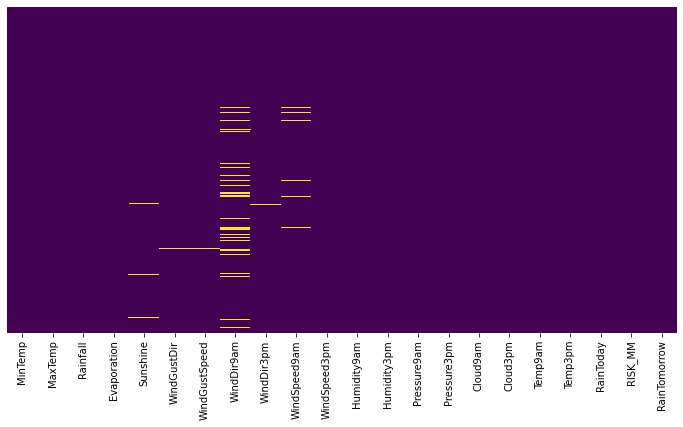

In [6]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
copy=True, add_indicator=False)

weather['Sunshine'] = imputer_int.fit_transform(weather[['Sunshine']])

In [8]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
copy=True, add_indicator=False)

weather['WindGustDir'] = imputer_str.fit_transform(weather[['WindGustDir']])
weather['WindGustSpeed'] = imputer_int.fit_transform(weather[['WindGustSpeed']])
weather['WindDir9am'] = imputer_str.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = imputer_str.fit_transform(weather[['WindDir3pm']])
weather['WindSpeed9am'] = imputer_int.fit_transform(weather[['WindSpeed9am']])

<AxesSubplot:>

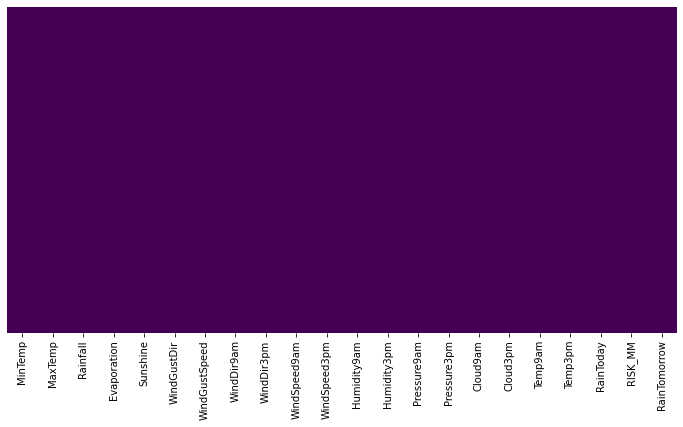

In [9]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Drop the RISK_MM variable

weather.drop('RISK_MM', inplace=True,axis=1)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


In [11]:
# "groupby" we have important information about the possible conditions that may or may not cause rain condition

weather[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
'Temp3pm']].groupby(weather['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [12]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

weather['WindGustDir'] = LB.fit_transform(weather[['WindGustDir']])
weather['WindDir9am'] = LB.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = LB.fit_transform(weather[['WindDir3pm']])

In [13]:
# Use LabelEncoder for target variables

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

weather['RainToday'] = LE.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = LE.fit_transform(weather['RainTomorrow'])

In [14]:
weather.head().T

,0,1,2,3,4
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,0.0,0.0,0.0,0.0,0.0
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,0.0,1.0,0.0,0.0,0.0
WindDir3pm,0.0,0.0,0.0,0.0,0.0
WindSpeed9am,6.0,4.0,6.0,30.0,20.0


In [15]:
# Identify the dependent and Target variables

IndepVar = []
for col in weather.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)

TargetVar = 'RainTomorrow'

x = weather[IndepVar]
y = weather[TargetVar]

In [16]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 6)
x_test_F1 = x_test.copy()

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# SVC Algorithm - Gaussian Kernal

In [18]:
# Training the SVM algorithm

from sklearn.svm import SVC

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelSVMGaussian.fit(x_train, y_train)

# Predicting the values

y_pred = modelSVMGaussian.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[ 9 10]
 [ 1 90]]
Outcome Values : 
 9 10 1 90
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.47      0.62        19
           0       0.90      0.99      0.94        91

    accuracy                           0.90       110
   macro avg       0.90      0.73      0.78       110
weighted avg       0.90      0.90      0.89       110

Accuracy : 90.0 %
Precision : 90.0 %
Recall : 47.4 %
F1 Score : 0.621
Balanced Accuracy : 73.2 %
MCC 0.608
roc_auc_score: 0.731


In [19]:
# Results - predict vs actual values

Results1 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal1 = x_test_F1.merge(Results1, left_index=True, right_index=True)
ResultsFinal1.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
346,4.5,23.9,0.0,4.8,11.7,0,30.0,0,0,4.0,...,27,1025.8,1021.5,0,4,12.6,22.3,0,0,0
19,15.6,33.4,0.0,8.0,10.4,0,33.0,0,0,2.0,...,27,1018.5,1013.7,0,1,22.8,32.0,0,0,0
143,12.8,24.9,0.0,2.4,6.2,0,30.0,0,0,6.0,...,44,1023.2,1019.3,7,6,15.5,24.2,0,0,0
136,11.3,32.3,0.0,9.4,11.4,0,28.0,0,0,4.0,...,17,1024.3,1020.7,5,2,18.2,30.5,0,0,0
17,11.7,30.0,1.2,7.2,10.1,0,52.0,0,0,6.0,...,26,1016.4,1013.0,1,5,20.1,28.6,1,0,0
181,-1.8,14.8,0.0,1.4,7.0,0,28.0,1,0,2.0,...,40,1024.2,1020.5,1,7,5.3,13.9,0,0,0
112,16.3,24.8,1.8,7.8,3.8,0,50.0,0,0,4.0,...,56,1011.8,1008.4,7,7,17.5,24.0,1,1,1
299,-1.5,17.3,0.0,2.8,9.0,0,48.0,0,0,0.0,...,23,1023.9,1020.3,5,7,4.8,15.8,0,0,0
209,1.4,16.8,0.0,1.6,8.2,0,20.0,0,0,0.0,...,50,1027.2,1024.7,1,4,6.2,16.3,0,0,0
258,-0.9,12.8,0.2,2.0,1.9,0,17.0,0,0,6.0,...,62,1024.1,1020.8,7,7,2.7,12.1,0,0,0


# Random Forest Algorithm

In [20]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
criterion='entropy', max_depth=None, max_features='auto',
max_leaf_nodes=None, max_samples=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100,
n_jobs=None, oob_score=False, random_state=0, verbose=0,
warm_start=False)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with test data set

y1_pred = modelRF.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y1_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

Confusion matrix : 
 [[10  9]
 [ 3 88]]
Outcome Values : 
 10 9 3 88
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.53      0.62        19
           0       0.91      0.97      0.94        91

    accuracy                           0.89       110
   macro avg       0.84      0.75      0.78       110
weighted avg       0.88      0.89      0.88       110

Accuracy : 89.1 %
Precision : 76.9 %
Recall : 52.6 %
F1 Score : 0.625
Balanced Accuracy : 74.6 %
MCC 0.578
roc_auc_score: 0.747


In [21]:
# Results - predict vs actual values

Results1 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y1_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal1 = x_test_F1.merge(Results1, left_index=True, right_index=True)
ResultsFinal1.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
66,14.3,34.1,0.0,6.6,10.500000,0,39.0,0,0,6.0,...,34,1006.6,1003.3,1,1,18.9,31.9,0,0,0
179,4.3,11.3,7.2,4.4,5.600000,0,57.0,0,0,26.0,...,60,1006.3,1008.1,3,6,7.1,8.8,1,0,0
265,-3.5,11.2,0.0,1.6,7.700000,0,26.0,0,0,6.0,...,48,1033.5,1031.1,1,5,3.6,10.1,0,0,0
221,7.4,16.3,0.0,1.2,7.909366,0,30.0,0,0,6.0,...,65,1031.4,1027.9,7,7,12.1,14.5,0,1,0
93,14.9,28.8,0.0,5.8,8.100000,0,30.0,0,0,7.0,...,44,1018.2,1014.5,7,2,19.1,27.0,0,0,0
240,-1.5,14.8,0.0,2.2,8.000000,0,15.0,0,0,6.0,...,41,1029.1,1026.0,4,3,2.1,14.5,0,0,0
340,11.2,18.0,0.0,4.8,8.400000,0,65.0,0,0,24.0,...,40,1009.5,1005.3,5,4,12.8,16.2,0,1,1
280,-0.6,11.1,0.0,3.0,5.000000,0,41.0,0,0,7.0,...,78,1018.4,1015.9,7,7,3.8,5.7,0,1,0
359,3.3,25.5,0.0,5.2,10.800000,0,43.0,0,0,4.0,...,16,1018.8,1014.6,0,3,12.0,24.8,0,0,0
230,0.4,15.5,0.0,1.0,4.700000,0,13.0,0,0,6.0,...,70,1026.7,1023.5,5,7,4.0,15.0,0,0,0


# Decision Tree Algorithm

In [22]:
# To build the decision tree model with Over sampling

from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
max_depth=None, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y2_pred = modelDT.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y2_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

Confusion matrix : 
 [[ 8 11]
 [19 72]]
Outcome Values : 
 8 11 19 72
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.42      0.35        19
           0       0.87      0.79      0.83        91

    accuracy                           0.73       110
   macro avg       0.58      0.61      0.59       110
weighted avg       0.77      0.73      0.74       110

Accuracy : 72.7 %
Precision : 29.6 %
Recall : 42.1 %
F1 Score : 0.348
Balanced Accuracy : 60.6 %
MCC 0.186
roc_auc_score: 0.606


In [23]:
# Results - predict vs actual values

Results3 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y2_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal3 = x_test_F1.merge(Results3, left_index=True, right_index=True)
ResultsFinal3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,1
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,1
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# Logistic Algorithm

In [24]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='auto',
n_jobs=None, penalty='l2', random_state=None,
solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y3_pred = modelLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

Confusion matrix : 
 [[ 8 11]
 [ 3 88]]
Outcome Values : 
 8 11 3 88
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.42      0.53        19
           0       0.89      0.97      0.93        91

    accuracy                           0.87       110
   macro avg       0.81      0.69      0.73       110
weighted avg       0.86      0.87      0.86       110

Accuracy : 87.3 %
Precision : 72.7 %
Recall : 42.1 %
F1 Score : 0.533
Balanced Accuracy : 69.4 %
MCC 0.489
roc_auc_score: 0.694


In [25]:
# Results - predict vs actual values

Results4 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y3_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal4 = x_test_F1.merge(Results4, left_index=True, right_index=True)
ResultsFinal4.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# KNN Algorithm

In [26]:
# To build the 'KNN' model

from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelKNN = modelKNN.fit(x_train, y_train)

# Predict the model with test data set

y4_pred = modelKNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y4_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

Confusion matrix : 
 [[ 4 15]
 [ 3 88]]
Outcome Values : 
 4 15 3 88
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.21      0.31        19
           0       0.85      0.97      0.91        91

    accuracy                           0.84       110
   macro avg       0.71      0.59      0.61       110
weighted avg       0.81      0.84      0.80       110

Accuracy : 83.6 %
Precision : 57.1 %
Recall : 21.1 %
F1 Score : 0.308
Balanced Accuracy : 58.9 %
MCC 0.275
roc_auc_score: 0.589


In [27]:
# Results - predict vs actual values

Results5 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y4_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal5 = x_test_F1.merge(Results5, left_index=True, right_index=True)
ResultsFinal5.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# Gradient Boosting Algorithm

In [28]:
# To build the 'Gradient Boosting' model

from sklearn.ensemble import GradientBoostingClassifier

modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
subsample=1.0, criterion='friedman_mse', min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
min_impurity_decrease=0.0, min_impurity_split=None, init=None,
random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
tol=0.0001, ccp_alpha=0.0)

modelXGB = modelXGB.fit(x_train,y_train)

# Predict the model with test data set

y5_pred = modelXGB.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y5_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

Confusion matrix : 
 [[13  6]
 [ 8 83]]
Outcome Values : 
 13 6 8 83
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65        19
           0       0.93      0.91      0.92        91

    accuracy                           0.87       110
   macro avg       0.78      0.80      0.79       110
weighted avg       0.88      0.87      0.88       110

Accuracy : 87.3 %
Precision : 61.9 %
Recall : 68.4 %
F1 Score : 0.65
Balanced Accuracy : 79.8 %
MCC 0.574
roc_auc_score: 0.798


In [29]:
# Results - predict vs actual values

Results6 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y5_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal6 = x_test_F1.merge(Results6, left_index=True, right_index=True)
ResultsFinal6.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0
